# Introduction

<center><img src="https://i.imgur.com/8dUga6i.jpg" width="500px"></center> 

In this kernel, I will be explaining the meaning and intuition behind each component in the dataset, including the images, LiDAR, and pointclouds. After diving into the theory behind these concepts, I will show how this dataset can be packaged into a compact format which makes it easier to query information from the dataset. And finally, I will show how to visualize and explore this data using plots and graphs in *matplotlib*. 

# Acknowledgements

* [NuScences DevKit ~ by Lyft](https://github.com/lyft/nuscenes-devkit)
* [EDA - 3D Object Detection Challenge ~ by beluga](https://www.kaggle.com/gaborfodor/eda-3d-object-detection-challenge)
* [Lyft: EDA, Animations, generating CSVs ~ by xhulu](https://www.kaggle.com/xhlulu/lyft-eda-animations-generating-csvs)
* [Lidar - Wikipedia](https://en.wikipedia.org/wiki/Lidar)

<html><font size=3 color='red'>If you find this kernel interesting, please drop an upvote. It motivates me to produce more quality content :)</font></html>

### A self-driving car in action!

Before we dive into the technical details of this kernel, let us watch an interesting video of a self-driving car in action!

In [1]:
from IPython.display import HTML
HTML('<center><iframe width="700" height="400" src="https://www.youtube.com/embed/tlThdr3O5Qo?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe></center>')

It can be seen in the video that the car is able to effortlessly take turns, change lanes, stop at red lights, etc. This is possible because the car is able to accurately recognize objects in 3D space using information from it's sensors, such as image and LiDAR data. So, I will now look at what these forms of data mean theoretically, and then, I will visualize this information later in the kernel.

# The dataset structure

1. `scene` - Consists of 25-45 seconds of a car's journey in a given environment. Each scence is composed of many samples.
2. `sample` - A snapshot of a scence at a particular instance in time. Each sample is annoted with the objects present.
3. `sample_data` - Contains the data collected from a particular sensor on the car.
4. `sample_annotation` - An annotated instance of an object within our interest.
5. `instance` - An enumeration of all object instance we observed.
6. `category` - Taxonomy of object categories (e.g. vehicle, human). 
7. `attribute` - Property of an instance that can change while the category remains the same.
8. `visibility` - (currently not used)
9. `sensor` - A specific sensor type.
10. `calibrated sensor` - Definition of a particular sensor as calibrated on a particular vehicle.
11. `ego_pose` - Ego vehicle poses at a particular timestamp.
12. `log` - Log information from which the data was extracted.
13. `map` - Map data that is stored as binary semantic masks from a top-down view.

Each snapshot in the data consists of two forms of information: **image data and LiDAR data**.

The image data is in the usual *.jpeg* format, which is fairly simple to understand. Each image simply consists of three color channels: Red (R), Blue (B), and Green (G) that form the RGB color image format. These color channels superimpose to form the final colored image. These images can therefore be stored in a four-dimensional tensor with dimensions as: **(batch_size, channels, width, height)**.

Now, I will move on to the LiDAR data, which fewer people might be familiar with. I will explain how LiDAR data is collected and stored, and then I will talk about the intuition behind this data format.

# What is LiDAR?

LiDAR (Light Detection and Ranging) is a method used to generate accurate 3D representations of the surroundings, and it uses laser light to achieve this. Basically, the 3D target is illuminated with a laser light (a focused, directed beam of light) and the reflected light is collected by sensors. The time required for the light to reflect back to the sensor is calculated. 

**Different sensors collect light from different parts of the object, and the times recorded by the sensors would be different. This difference in time calculated by the sensors can be used to calculate the depth of the object. This depth information combined with the 2D represenation of the image provides an accurate 3D representation of the object. This process is similar to actual human vision. Two eyes make observations in 2D and these two pieces of information are combined to form a 3D map (depth perception). This is how humans sense the world around us**.

This technology is used to create 3D representations in many real world scenarios. For example, it is used in farms to help sow seeds and remove weeds. A moving robot uses LiDAR to to create a 3D map of its surroundings and using this map, it avoids obstacles and completes its tasks. This technology is also used in archaeology. LiDAR is used to create 3D renderings of 2D scans of artifacts. This gives an accurate idea of the 3D shape of the artifact when the artifact cannot be excavated for whatever reason. Finally, LiDAR can also be used to render high quality 3D maps of ocean floors and other inaccesible terrains, making it very useful to geologists and oceanographers. Below is a 3D map of an ocean floor generated using LiDAR:

<center><img src="https://i.imgur.com/yG3CewG.jpg" width="500px"></center>

And, of course, self-driving cars use this technology to identify objects around them in 3D dimensions, along with estimating the velocities and orientations of these objects. This comprehensive 3D map provides the car with detailed information so that it can navigate even in complex environments. Below is a video featuring a drone equipped with LiDAR. It automatically creates a 3D map of the world around it using the process mentioned above.

In [2]:
HTML('<center><iframe width="700" height="400" src="https://www.youtube.com/embed/x7De3tCb3_A?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe></center>')

# How does LiDAR work?

<img src="https://i.imgur.com/Frl3hgk.gif" width="300" height="300" align="center"/>

The above GIF roughly demonstrates how LiDAR works. Basically, laser beams are shot in all directions by a laser. The laser beams reflect off the objects in their path and the reflected beams are collected by a sensor. Now, a special device called a **Flash LiDAR Camera** is used to create 3D maps using the information from these sensors.

### Flash LiDAR Camera

<img src="https://i.imgur.com/C3zUR7X.jpg" width="250" height="250" align="center"/>

The device featured in the image above is called a Flash LiDAR Camera. The focal plane of a Flash LiDAR camera has rows and columns of pixels with ample "depth" and "intensity" to create 3D landscape models. Each pixel records the time it takes each laser pulse to hit the target and return to the sensor, as well as the depth, location, and reflective intensity of the object being contacted by the laser pulse.

The Flash LiDAR uses a single light source that illuminates the field of view in a single pulse. Just like a camera that takes pictures of distance, instead of colors.

The onboard source of illumination makes Flash lidar an active sensor. The signal that is returned is processed by embedded algorithms to produce a nearly instantaneous 3D rendering of objects and terrain features within the field of view of the sensor. The laser pulse repetition frequency is sufficient for generating 3D videos with high resolution and accuracy. The high frame rate of the sensor makes it a useful tool for a variety of applications that benefit from real-time visualization, such as autonomous vehicle driving. By immediately returning a 3D elevation mesh of target landscapes, a flash sensor can be used by an autonomous vehicle to make decisions regarding speed adjustment, braking, steering, etc.

This type of camera is attached to the top of autonomous cars, and these cars use this to navigate while driving.

Now, since it is clear what LiDAR is and how it works, we can get right to visualizing the dataset.

# Visualizing the data

### Install *lyft_dataset_sdk* and import the necessary libraries

We will need the *lyft_dataset_sdk* library because it will help us visualize the image and LiDAR data easily. Only a simple *pip install* command is required. I will also use install the *chart_studio* library to generate interactive plots.

In [3]:
!pip install lyft_dataset_sdk

Now, I will import the other libraries necessary to carry out the exploration.

In [13]:
#pip install plotly
#!pip install scikit-image

     |████████████████████████████████| 26.5MB 2.4MB/s eta 0:00:01    |█                               | 768kB 2.4MB/s eta 0:00:11     |███████████████████████████     | 22.4MB 2.4MB/s eta 0:00:02
     |████████████████████████████████| 1.6MB 64.9MB/s eta 0:00:01
     |████████████████████████████████| 4.4MB 70.5MB/s eta 0:00:01
     |████████████████████████████████| 3.3MB 66.6MB/s eta 0:00:01


In [32]:

import os
import gc
import numpy as np
import pandas as pd

import json
import math
import sys
import time
from datetime import datetime
from typing import Tuple, List

import cv2
import matplotlib.pyplot as plt
import sklearn.metrics
from PIL import Image

from matplotlib.axes import Axes
from matplotlib import animation, rc
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.offline import plot, init_notebook_mode
import plotly.figure_factory as ff

init_notebook_mode(connected=True)

import seaborn as sns
from pyquaternion import Quaternion
from tqdm import tqdm

from lyft_dataset_sdk.utils.map_mask import MapMask
from lyft_dataset_sdk.lyftdataset import LyftDataset
from lyft_dataset_sdk.utils.geometry_utils import view_points, box_in_image, BoxVisibility
from lyft_dataset_sdk.utils.geometry_utils import view_points, transform_matrix
from pathlib import Path

import struct
from abc import ABC, abstractmethod
from functools import reduce
from typing import Tuple, List, Dict
import copy

### Define the path containing the dataset

In [33]:
help(lyft_dataset_sdk)

NameError: name 'lyft_dataset_sdk' is not defined

In [19]:
DATA_PATH = 'input/'

### Load the training dataframe

In [21]:
train = pd.read_csv(DATA_PATH + 'train.csv')
#sample_submission = pd.read_csv(DATA_PATH + 'sample_submission.csv')

### Group data by object category

In [22]:
# Taken from https://www.kaggle.com/gaborfodor/eda-3d-object-detection-challenge

object_columns = ['sample_id', 'object_id', 'center_x', 'center_y', 'center_z',
                  'width', 'length', 'height', 'yaw', 'class_name']
objects = []
for sample_id, ps in tqdm(train.values[:]):
    object_params = ps.split()
    n_objects = len(object_params)
    for i in range(n_objects // 8):
        x, y, z, w, l, h, yaw, c = tuple(object_params[i * 8: (i + 1) * 8])
        objects.append([sample_id, i, x, y, z, w, l, h, yaw, c])
train_objects = pd.DataFrame(
    objects,
    columns = object_columns
)

100%|██████████| 22680/22680 [00:01<00:00, 19050.36it/s]


### Convert numerical features from *str* to *float32*

In [23]:
numerical_cols = ['object_id', 'center_x', 'center_y', 'center_z', 'width', 'length', 'height', 'yaw']
train_objects[numerical_cols] = np.float32(train_objects[numerical_cols].values)

In [24]:
train_objects.head()

,sample_id,object_id,center_x,center_y,center_z,width,length,height,yaw,class_name
0,db8b47bd4ebdf3b3fb21598bb41bd8853d12f8d2ef25ce...,0.0,2680.282959,698.196899,-18.047768,2.064,5.488,2.053,2.604164,car
1,db8b47bd4ebdf3b3fb21598bb41bd8853d12f8d2ef25ce...,1.0,2691.997559,660.801636,-18.674259,1.818,4.570,1.608,-0.335176,car
2,db8b47bd4ebdf3b3fb21598bb41bd8853d12f8d2ef25ce...,2.0,2713.607422,694.403503,-18.589972,1.779,4.992,1.620,2.579456,car
3,db8b47bd4ebdf3b3fb21598bb41bd8853d12f8d2ef25ce...,3.0,2679.986816,706.910156,-18.349594,1.798,3.903,1.722,2.586166,car
4,db8b47bd4ebdf3b3fb21598bb41bd8853d12f8d2ef25ce...,4.0,2659.352051,719.417480,-18.442999,1.936,4.427,1.921,2.601799,car


### First Exploration

Now, I will explore the data in this particular dataframe and see if I can derive any useful insights from it.

### center_x and center_y

**center_x** and **center_y** correspond to the *x* and *y* coordinates of the center of an object's location (bounding volume). These coordinates represent the location of an object on the *x-y* plane.

### Distributions of *center_x* and *center_y*

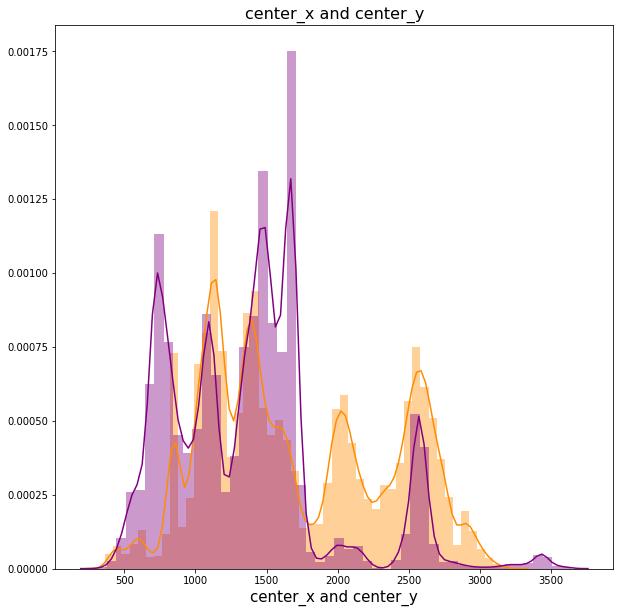

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.distplot(train_objects['center_x'], color='darkorange', ax=ax).set_title('center_x and center_y', fontsize=16)
sns.distplot(train_objects['center_y'], color='purple', ax=ax).set_title('center_x and center_y', fontsize=16)
plt.xlabel('center_x and center_y', fontsize=15)
plt.show()

In the diagram above, the purple distribution is that of *center_y* and the orange distribution is that of *center_x*. From the diagram above, we can see that the distributions of both *center_x* and *center_y* have multiple peaks, and are therefore multimodal. Both distributions also have a clear rightward or positive skew. But, the distribution of *center_y* (purple) has a signficantly higher skew that the the distribution of *center_x* (orange). The *center_x* distribution is more evenly spread out. 

This indicates that objects are spread out very evenly along the *x-axis*, but not likewise along the *y-axis*. This is probably because the car's camera can sense objects on either left or right easily (along the *x-axis*) due to the width of the road being small. But, since the length of the road is much greater than its width, and there is a higher chance of the camera's view being blocked from this angle, the camera can only find objects narrowly ahead or narrowly behind (and not further away).

### Relationship between *center_x* and *center_y*

### KDE Plot

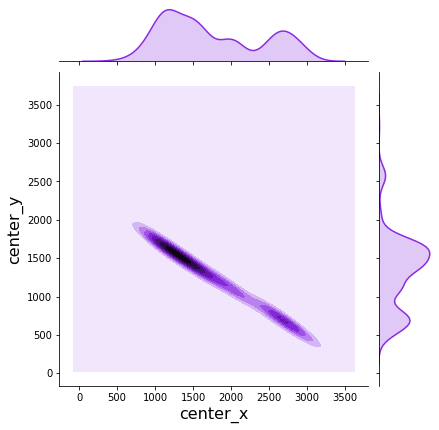

In [26]:
new_train_objects = train_objects.query('class_name == "car"')
plot = sns.jointplot(x=new_train_objects['center_x'][:1000], y=new_train_objects['center_y'][:1000], kind='kde', color='blueviolet')
plot.set_axis_labels('center_x', 'center_y', fontsize=16)
plt.show()

In the KDE plot above, we can see that *center_x* and *center_y* seem to have a somewhat negative correlation. This is probably, once again, due to the limitations of the camera system. The camera can detect objects that are far ahead, but not too far to the side. And, it can also detect objects that are far to side, but not too far ahead. But, **the camera cannot detect objects that are both far ahead and far to the side**. Because of this, objects that are far ahead and far to the side are not detected at all, and only objects which satisfy one (or none) of those conditions are detected. This results in a negative relationship between *center_x* and *center_y*.

### center_z

**center_z** corresponds to the *xz* coordinate of the center of an object's location (bounding volume). This coordinate represents the height of the object above the *x-y* plane.

### Distribution of *center_z*

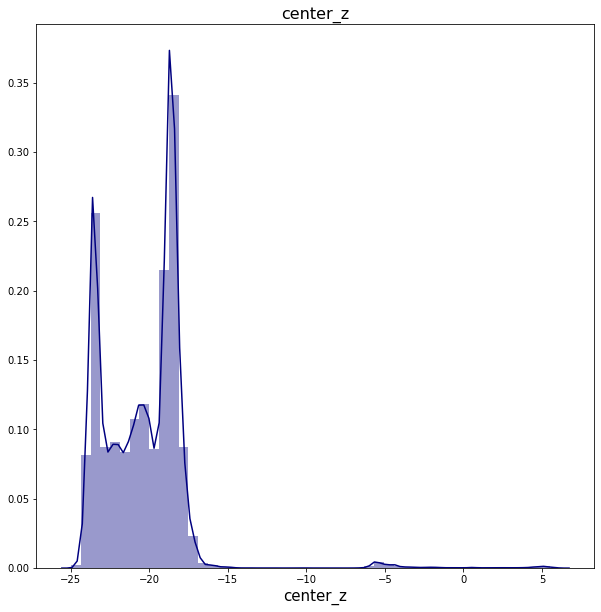

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.distplot(train_objects['center_z'], color='navy', ax=ax).set_title('center_z', fontsize=16)
plt.xlabel('center_z', fontsize=15)
plt.show()

In the above diagram, we can see that the distribution of *center_z* has an extremely high positive (rightward) skew and is clustered around the -20 mark (which is approximates its mean value). The variation (spread) of *center_z* is significantly smaller than that of *center_x* and *center_y*. This is probably because most objects are very close to the flat plane of the road, and therefore, there is no great variation in the height of the objects above (or below) the camera. There is understandably much greater variation in the *x* and *y* coordiantes of the object.

Also, most *z* coordinates are negative because the camera is attached at the top of the car. So, most of the times, the camera has to "look down" to see the objects. Therefore, the height or *z*-coordinate of the objects relative to the camera are generally negative.

### yaw

**yaw** is the angle of the volume around the *z*-axis, making 'yaw' the direction the front of the vehicle / bounding box is pointing at while on the ground.

### Distribution of *yaw*

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.distplot(train_objects['yaw'], color='darkgreen', ax=ax).set_title('yaw', fontsize=16)
plt.xlabel('yaw', fontsize=15)
plt.show()

In the diagram above, we can see that the distribution of *yaw* is roughly bimodal, *i.e.*, there are two mmajor peaks in the distribution. One of the peaks is around 0.5 and the other is around 2.5. One can estimate that the mean is between 1 and 2 (around 1.5). The distribution does not have any clear skew. The presence of the two peaks at symmetric positions reduces the skew in both directions (and they cancel out), making the distribution more balanced than the distributions of *center_x*, *center_y*, and *center_z*.

### width

**width** is simply the width of the bounding volume in which the object lies.

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.distplot(train_objects['width'], color='magenta', ax=ax).set_title('width', fontsize=16)
plt.xlabel('width', fontsize=15)
plt.show()

In the diagram above, we can see that the *width* is approximately normally distirbuted with a mean of around 2, with some outliers on either side. The majority of the objects are cars (as we will see later), and these constitute a width of around 2 (at the peak). The outliers on the right represent larger objecs like trucks and vans, and the outliers on the left represent smaller objects like pedestrians and bicycles.

### length

**length** is simply the length of the bounding volume in which the object lies.

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.distplot(train_objects['length'], color='crimson', ax=ax).set_title('length', fontsize=16)
plt.xlabel('length', fontsize=15)
plt.show()

In the diagram above, we can see that the *length* has a distribution with a strong positive (rightward skew) with a mean of around 5, with some outliers on either side. The majority of the objects are cars (as we will see later), and these constitute a length of around 5 (at the peak). The outliers on the right represent larger objecs like trucks and vans, and the outliers on the left represent smaller objects like pedestrians and bicycles.

### height

**height** is simply the height of the bounding volume in which the object lies.

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.distplot(train_objects['height'], color='indigo', ax=ax).set_title('height', fontsize=16)
plt.xlabel('height', fontsize=15)
plt.show()

In the diagram above, we can see that the *height* has a distribution with a strong positive (rightward skew) with a mean of around 2, with some outliers on either side. The majority of the objects are cars (as we will see later), and these constitute a length of around 2 (at the peak). The outliers on the right represent larger objecs like trucks and vans, and the outliers on the left represent smaller objects like pedestrians and bicycles.

### Frequency of object classes

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot = sns.countplot(y="class_name", data=train_objects.query('class_name != "motorcycle" and class_name != "emergency_vehicle" and class_name != "animal"'),
                     palette=['navy', 'darkblue', 'blue', 'dodgerblue', 'skyblue', 'lightblue']).set_title('Object Frequencies', fontsize=16)
plt.yticks(fontsize=14)
plt.xlabel("Count", fontsize=15)
plt.ylabel("Class Name", fontsize=15)
plt.show(plot)

From the above diagram, it can be seen that the most common object class in the dataset is "car". This is unsurprising because the images are taken from the streets of Palo Alto in Silicon Valley, California. And, the most common vehicle (or entity for that matter) visible on those roads are cars. All the other object classes are nowhere near cars in terms of frequency.

### center_x *vs.* class_name

In the plots below, I will explore how the distribution of **center_x** changes for different object **class_names**.

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))

plot = sns.violinplot(x="class_name", y="center_x",
                      data=train_objects.query('class_name != "motorcycle" and class_name != "emergency_vehicle" and class_name != "animal"'),
                      palette='YlGnBu',
                      split=True, ax=ax).set_title('center_x (for different objects)', fontsize=16)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Class Name", fontsize=15)
plt.ylabel("center_x", fontsize=15)
plt.show(plot)

In the violin plots above, we can see that the distributions of *center_x* for large vehicles including trucks, buses, and other vehicles are well spread. They barely have any skew and have greater means than the distributions for pedestrians and bicycles. This is probably because these large vehicles tend to keep greater distances from the other vehicles, and the smaller vehicles do not stay too close to these large vehicles in order to avoid accidents. Therefore, the mean *center_x* is clearly greater for larger vehicles like buses and trucks.

Contrastingly, the smaller objects like pedestrians and bicycles have *center_x* distributions with strong positive (rightward) skews. These distributions also have clearly lower means than the distributions for the larger vehicles. This is probably because pedestrians (road-crossers) and bicyclists do not need to maintain large distances with cars and trucks to avoid accidents. They usually cross the road during a red traffic signal, when the traffic halts.

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))

plot = sns.boxplot(x="class_name", y="center_x",
                   data=train_objects.query('class_name != "motorcycle" and class_name != "emergency_vehicle" and class_name != "animal"'),
                   palette='YlGnBu', ax=ax).set_title('center_x (for different objects)', fontsize=16)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Class Name", fontsize=15)
plt.ylabel("center_x", fontsize=15)
plt.show(plot)

In the box plots above, we can notice the same observation as in the violin plot above. The *center_x* distributions for smaller objects like pedestrians and bicycles have very low mean and quartile values as compared to larger objects like cars, trucks, and buses.

### center_y *vs.* class_name

In the plots below, I will explore how the distribution of **center_y** changes for different object **class_names**.

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))

plot = sns.violinplot(x="class_name", y="center_y",
                      data=train_objects.query('class_name != "motorcycle" and class_name != "emergency_vehicle" and class_name != "animal"'),
                      palette='YlOrRd',
                      split=True, ax=ax).set_title('center_y (for different objects)', fontsize=16)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Class Name", fontsize=15)
plt.ylabel("center_y", fontsize=15)
plt.show(plot)

In the violin plots above, we can see that the distributions of *center_y* for small objects including pedestrians and bicycles have a greater mean value than large objects like trucks and buses. The distributions for the small objects have much greater probability density concentrated at higher values of *center_y* as compared to large objects. This signifies that small objects, in general, have greater *center_y* values than large objects. 

This is probably because the large vehicles tend to be within the field of view of the camera due to their large size. But, smaller objects like bicycles and pedestrians cannot remain in the field of view of the camera when they are too close. Therefore, most pedestrains and bicycles that are detected tend to be far away. This causes the *center_y* to be greater (on average) for small objects as compared to large objects.

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))

plot = sns.boxplot(x="class_name", y="center_y",
                   data=train_objects.query('class_name != "motorcycle" and class_name != "emergency_vehicle" and class_name != "animal"'),
                   palette='YlOrRd', ax=ax).set_title('center_y (for different objects)', fontsize=16)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Class Name", fontsize=15)
plt.ylabel("center_y", fontsize=15)
plt.show(plot)

In the box plots above, we can notice the same observation as in the violin plot above. The *center_y* distributions for smaller objects like pedestrians and bicycles have much larger mean and quartile values as compared to larger objects like cars, trucks, and buses.

### center_z *vs.* class_name

In the plots below, I will explore how the distribution of **center_z** changes for different object **class_names**.

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))

plot = sns.violinplot(x="class_name", y="center_z",
                      data=train_objects.query('class_name != "motorcycle" and class_name != "emergency_vehicle" and class_name != "animal"').query('center_z <= -5'),
                      palette='RdPu',
                      split=True, ax=ax).set_title('center_z (for different objects)', fontsize=16)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Class Name", fontsize=15)
plt.ylabel("center_z", fontsize=15)
plt.show(plot)

In the violin plots above, we can see that the distributions of *center_z* for small objects including pedestrians and bicycles have a significantly smaller mean value than large objects like trucks and buses. The distributions for the small objects have much greater probability density concentrated at lower values of *center_z* as compared to large objects. This signifies that small objects, in general, have smaller *center_y* values than large objects. 

This is probably because smaller objects like pedestrians and bicycles tend to have a lower height with repsect to the camera. And, on the other hand, larger objects like cars, trucks, and buses tend to have a greater height with respect to the camera.

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))

plot = sns.boxplot(x="class_name", y="center_z",
                   data=train_objects.query('class_name != "motorcycle" and class_name != "emergency_vehicle" and class_name != "animal"').query('center_z <= -5'),
                   palette='RdPu', ax=ax).set_title('center_z (for different objects)', fontsize=16)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Class Name", fontsize=15)
plt.ylabel("center_z", fontsize=15)
plt.show(plot)

In the box plots above, we can notice the same observation as in the violin plot above. The *center_z* distributions for smaller objects like pedestrians and bicycles have much smaller mean and quartile values as compared to larger objects like cars, trucks, and buses.

### width *vs.* class_name

In the plots below, I will explore how the distribution of **width** changes for different object **class_names**.

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))

plot = sns.violinplot(x="class_name", y="width",
                      data=train_objects.query('class_name != "motorcycle" and class_name != "emergency_vehicle" and class_name != "animal"'),
                      palette='YlGn',
                      split=True, ax=ax).set_title('width (for different objects)', fontsize=16)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Class Name", fontsize=15)
plt.ylabel("width", fontsize=15)
plt.show(plot)

In the violin plots, we can clearly see that the *width* distributions for large vehicles like cars, buses, and trucks have much larger means as compared to small objects like pedestrians and bicycles. This is not surprising because trucks, buses, and cars almost always have much greater width than pedestrians and bicycles.

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))

plot = sns.boxplot(x="class_name", y="width",
                   data=train_objects.query('class_name != "motorcycle" and class_name != "emergency_vehicle" and class_name != "animal"'),
                   palette='YlGn', ax=ax).set_title('width (for different objects)', fontsize=16)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Class Name", fontsize=15)
plt.ylabel("width", fontsize=15)
plt.show(plot)

In the box plots above, we can notice the same observation as in the violin plot above. The *width* distributions for smaller objects like pedestrians and bicycles have much smaller mean and quartile values as compared to larger objects like cars, trucks, and buses.

### length *vs.* class_name

In the plots below, I will explore how the distribution of **length** changes for different object **class_names**.

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))

plot = sns.violinplot(x="class_name", y="length",
                      data=train_objects.query('class_name != "motorcycle" and class_name != "emergency_vehicle" and class_name != "animal" and length < 15'),
                      palette='Purples',
                      split=True, ax=ax).set_title('length (for different objects)', fontsize=16)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Class Name", fontsize=15)
plt.ylabel("length", fontsize=15)
plt.show(plot)

In the violin plots, we can clearly see that the *length* distributions for large vehicles like cars, buses, and trucks have much larger means as compared to small objects like pedestrians and bicycles. This is not surprising because trucks, buses, and cars almost always have much greater length than pedestrians and bicycles.

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))

plot = sns.boxplot(x="class_name", y="length",
                   data=train_objects.query('class_name != "motorcycle" and class_name != "emergency_vehicle" and class_name != "animal" and length < 15'),
                   palette='Purples', ax=ax).set_title('length (for different objects)', fontsize=16)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Class Name", fontsize=15)
plt.ylabel("length", fontsize=15)
plt.show(plot)

In the box plots above, we can notice the same observation as in the violin plot above. The *length* distributions for smaller objects like pedestrians and bicycles have much smaller mean and quartile values as compared to larger objects like cars, trucks, and buses.

### height *vs.* class_name

In the plots below, I will explore how the distribution of **height** changes for different object **class_names**.

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))

plot = sns.violinplot(x="class_name", y="height",
                      data=train_objects.query('class_name != "motorcycle" and class_name != "emergency_vehicle" and class_name != "animal" and height < 6'),
                      palette='Reds',
                      split=True, ax=ax).set_title('height (for different objects)', fontsize=16)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Class Name", fontsize=15)
plt.ylabel("height", fontsize=15)
plt.show(plot)

In the violin plots, we can clearly see that the *length* distributions for large vehicles like buses and trucks have much larger means as compared to small objects like pedestrians and bicycles. This is not surprising because trucks and buses almost always have much greater length than pedestrians and bicycles.

The only exception to this trend are the cars. They tend to have a similar height to that of pedestrians.

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))

plot = sns.boxplot(x="class_name", y="height",
                   data=train_objects.query('class_name != "motorcycle" and class_name != "emergency_vehicle" and class_name != "animal" and height < 6'),
                   palette='Reds', ax=ax).set_title('height (for different objects)', fontsize=16)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Class Name", fontsize=15)
plt.ylabel("height", fontsize=15)
plt.show(plot)

In the box plots above, we can notice the same observation as in the violin plot above. The *height* distributions for smaller objects like pedestrians and bicycles have much smaller mean and quartile values as compared to larger objects like cars, trucks, and buses.

Once again, the only exception to this trend are the cars. They tend to have a similar height to that of pedestrians.